# **`flygym`-MuJoCo tutorial**: Complex terrain

<a target="_blank" href="https://colab.research.google.com/github/NeLy-EPFL/flygym/blob/main/notebooks/mujoco_terrain.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

**NOTE: You need to select a GPU instance on Google Colab for this notebook. Go to "Runtime" > "Change runtime type", select "GPU" under "Hardware accelerator" and click "Save."**

See [GitHub repo](https://github.com/NeLy-EPFL/flygym) for code and [documentation here](https://nely-epfl.github.io/flygym/).

In [1]:
#@title Install `flygym` on Colab

# This block is modified from dm_control's tutorial notebook
# https://github.com/deepmind/dm_control/blob/main/tutorial.ipynb

try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
    import subprocess
    if subprocess.run('nvidia-smi').returncode:
        raise RuntimeError(
            'Cannot communicate with GPU. '
            'Make sure you are using a GPU Colab runtime. '
            'Go to the Runtime menu and select Choose runtime type.')

    print('Installing flygym')
    !pip install -q --progress-bar=off 'flygym[mujoco] @ git+https://github.com/NeLy-EPFL/flygym.git'

    # Configure dm_control to use the EGL rendering backend (requires GPU)
    %env MUJOCO_GL=egl

    print('Checking that the dm_control installation succeeded...')
    try:
        from dm_control import suite
        env = suite.load('cartpole', 'swingup')
        pixels = env.physics.render()
    except Exception as e:
        raise e from RuntimeError(
            'Something went wrong during dm_control installation. Check the shell '
            'output above for more information.\n'
            'If using a hosted Colab runtime, make sure you enable GPU acceleration '
            'by going to the Runtime menu and selecting "Choose runtime type".')
    else:
        del pixels, suite

    print('Checking that the flygym installation succeeded...')
    try:
        import flygym
        from flygym import envs
    except Exception as e:
        raise e from RuntimeError(
            'Something went wrong during flygym installation. Check the shell '
            'output above for more information.\n')
    else:
        del envs, flygym
else:
    print('Skipping - not on Colab')


Skipping - not on Colab


---

We have implemented slightly more complex arenas. You can read more about it [here](https://nely-epfl.github.io/flygym/arena/index.html).

 <img src="https://raw.githubusercontent.com/NeLy-EPFL/flygym/main/doc/source/_static/terrain.jpg" alt="Terrain types" width="800"> 


You can import these predefined arenas from `flygym.arena.mujoco_arena`:

In [2]:
from flygym.arena.mujoco_arena import (
    FlatTerrain,
    GappedTerrain,
    BlocksTerrain,
    MixedTerrain,
)

Each arena comes with a set of parameters that you can configure. Consult the API documentation for more details. Here, we will use `BlockTerrain` as an example:

In [3]:
arena = BlocksTerrain(
    x_range=(-10000, 20000),  # these define the size of the arena
    y_range=(-10000, 10000),
    friction=(1.0, 0.005, 0.0001),  # sliding, torsional, and rolling friction coefs
    block_size=1000,  # size of each block
    height_range=(100, 500),  # range of block height variation
    rand_seed=0,  # seed for randomized block heights
)

Let's create a simulation and simulate it for 1 step:

In [4]:
import numpy as np
from flygym.envs.nmf_mujoco import NeuroMechFlyMuJoCo, MuJoCoParameters
from flygym.state import stretched_pose
from flygym.util.config import all_leg_dofs

sim_params = MuJoCoParameters(timestep=1e-4, render_mode="saved", render_playspeed=0.1)
nmf = NeuroMechFlyMuJoCo(
    sim_params=sim_params,
    init_pose=stretched_pose,
    actuated_joints=all_leg_dofs,
    arena=arena,  # pass the arena we defined earler here
    spawn_pos=(0, 0, 500),  # you can further define the spawn position ...
    spawn_orient=(0, 1, 0, 0),  # ... and orientation of the fly
)

action = {"joints": np.zeros(len(all_leg_dofs))}
obs, reward, terminated, truncated, info = nmf.step(action)
nmf.render()
nmf.close()

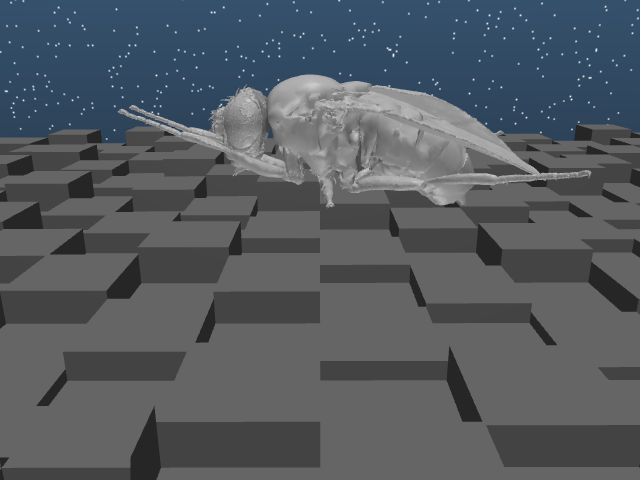

In [5]:
from PIL import Image
Image.fromarray(nmf._frames[0])

Observe that the blocks have slightly different heights as defined earlier.